In [1]:
# import the necessary libraries
import re
import requests
import random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
from time import sleep
from bs4 import BeautifulSoup
import os

# global properties
# data_dir = "data/" # where to save data
# num_search_pages = 50 # how many search pages to cull through

# NOTE:
# if you haven't yet downloaded the data, this should be set to True
download_data = False

In [104]:
# World COVID Data
# Import data from .csv file
world_covid_fname = os.path.join("data/1_owid",
                     "owid-covid-data.csv")
world_covid_df = pd.read_csv(world_covid_fname)


eu_covid_fname = os.path.join("data/2_ecdc", "testing.csv")
    # also admissionrates, agerangenotificationeu, country_response_measures, dailynotificationeu
    # notification, testing, weeklynotificationeu
eu_testing_df = pd.read_csv(eu_covid_fname)

alabama_covid_fname = os.path.join("data/3_covidtracking", "alabama-history.csv")
us_covid_fname = os.path.join("data/3_covidtracking", "national-history.csv")
alabama_covid_df = pd.read_csv(alabama_covid_fname)
us_covid_df = pd.read_csv(us_covid_fname)
world_covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Data Cleaning

In [18]:
# will use the world covid data for now
world_covid_df["location"].value_counts() # 192 countries


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498


In [19]:
# checking null values
world_covid_df[world_covid_df["total_deaths"].isnull()] #wonder if we can impute total deaths based on previous values?
# about 8000 rows have NaN total deaths across 187 countries
world_covid_df[~world_covid_df["extreme_poverty"].isnull()]
#check reproduction rate - seems to have a lot of nulls

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
316,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
317,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
318,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
319,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
320,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
321,ALB,Europe,Albania,2020-03-14,38.0,5.0,5.429,1.0,0.0,0.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
322,ALB,Europe,Albania,2020-03-15,42.0,4.0,6.000,1.0,0.0,0.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
323,ALB,Europe,Albania,2020-03-16,51.0,9.0,7.000,1.0,0.0,0.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
324,ALB,Europe,Albania,2020-03-17,55.0,4.0,6.429,1.0,0.0,0.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
325,ALB,Europe,Albania,2020-03-18,59.0,4.0,6.714,2.0,1.0,0.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D840112080>]],
      dtype=object)

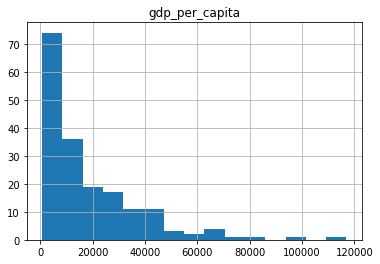

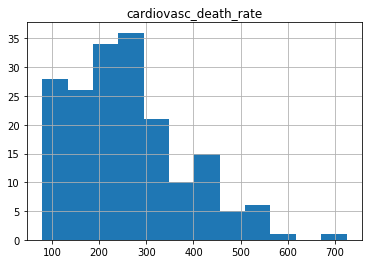

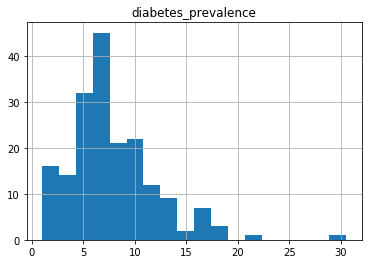

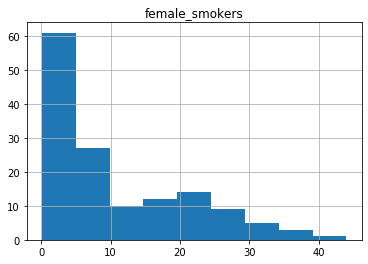

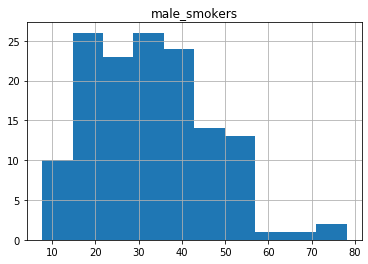

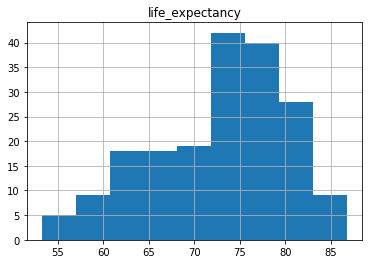

In [33]:
world_covid_df[world_covid_df["date"]=="2021-01-01"].hist(column="gdp_per_capita", bins='auto')
world_covid_df[world_covid_df["date"]=="2021-01-01"].hist(column="cardiovasc_death_rate", bins='auto')
world_covid_df[world_covid_df["date"]=="2021-01-01"].hist(column="diabetes_prevalence", bins='auto')
world_covid_df[world_covid_df["date"]=="2021-01-01"].hist(column="female_smokers", bins='auto')
world_covid_df[world_covid_df["date"]=="2021-01-01"].hist(column="male_smokers", bins='auto')
world_covid_df[world_covid_df["date"]=="2021-01-01"].hist(column="life_expectancy", bins='auto')




In [42]:
world_covid_df[world_covid_df["date"]=="2021-01-01"].sort_values(by=['total_deaths'], ascending=True)[0:15][['location', 'total_deaths', 'total_cases', 'positive_rate', 'stringency_index', 'population_density', 'gdp_per_capita', 'cardiovasc_death_rate']]


,location,total_deaths,total_cases,positive_rate,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate
35031,Mongolia,1.0,1242.0,NaN,NaN,1.980,11840.846,460.043
16886,Eritrea,1.0,1252.0,NaN,NaN,44.304,1510.459,311.110
8581,Burundi,2.0,822.0,NaN,NaN,423.062,702.225,293.068
18136,Fiji,2.0,49.0,NaN,NaN,49.562,8702.975,412.820
7697,Brunei,3.0,157.0,NaN,NaN,81.347,71809.251,201.285
34730,Monaco,3.0,885.0,NaN,NaN,19347.500,NaN,NaN
1827,Antigua and Barbuda,5.0,159.0,NaN,NaN,231.845,21490.943,191.511
43972,Saint Lucia,5.0,353.0,NaN,NaN,293.187,12951.839,204.620
4658,Barbados,7.0,395.0,NaN,NaN,664.463,16978.068,170.050
51321,Taiwan,7.0,802.0,0.006,NaN,NaN,NaN,103.957


In [41]:
world_covid_df[world_covid_df["date"]=="2021-01-01"].sort_values(by=['gdp_per_capita'], ascending=False)[0:15][['location', 'total_deaths', 'total_cases', 'positive_rate', 'stringency_index', 'population_density', 'gdp_per_capita', 'cardiovasc_death_rate']]

,location,total_deaths,total_cases,positive_rate,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate
42438,Qatar,245.0,144042.0,0.045,56.48,227.322,116935.600,176.690
31245,Luxembourg,495.0,46415.0,NaN,83.33,231.447,94277.965,128.275
46764,Singapore,29.0,58629.0,NaN,NaN,7915.731,85535.383,92.243
7697,Brunei,3.0,157.0,NaN,NaN,81.347,71809.251,201.285
25398,Ireland,2248.0,93532.0,0.086,NaN,69.874,67335.293,126.459
54673,United Arab Emirates,671.0,209678.0,0.010,NaN,112.442,67293.483,317.840
28256,Kuwait,936.0,150869.0,0.080,NaN,232.128,65530.537,132.235
39026,Norway,436.0,49803.0,0.037,NaN,14.462,64800.057,114.316
50677,Switzerland,7704.0,452296.0,NaN,60.19,214.243,57410.166,99.739
44630,San Marino,59.0,2428.0,NaN,70.37,556.667,56861.470,NaN


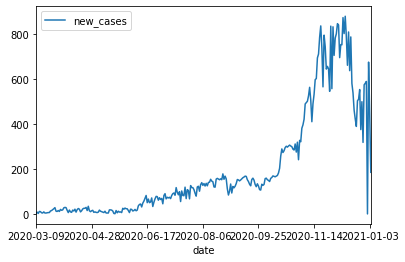

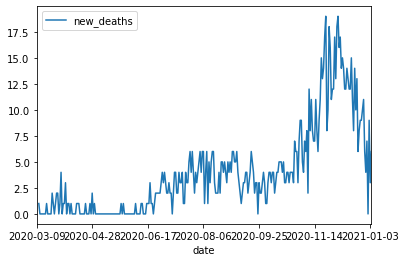

In [24]:

albania_df = world_covid_df[world_covid_df["location"]=="Albania"] #~300 rows per country
albania_df.plot(x='date', y='new_cases', kind='line') 
plt.show()
albania_df.plot(x='date', y='new_deaths', kind='line') 
plt.show()

# Processing World COVID Data
Cleaning and EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6CFB290B8>]],
      dtype=object)

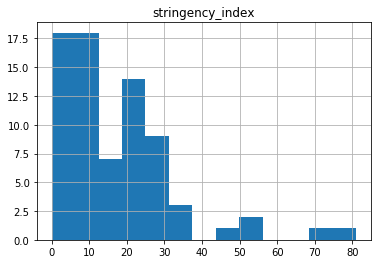

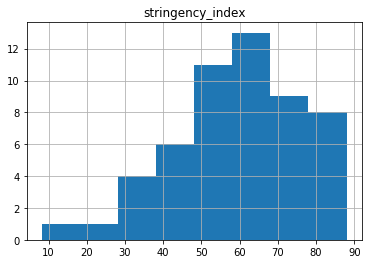

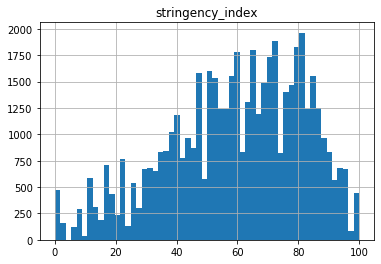

In [5]:
world_covid_df[world_covid_df["date"]=="2020-03-01"].hist(column="stringency_index", bins='auto')
world_covid_df[world_covid_df["date"]=="2021-01-01"].hist(column="stringency_index", bins='auto')
world_covid_df.hist(column="stringency_index", bins='auto')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


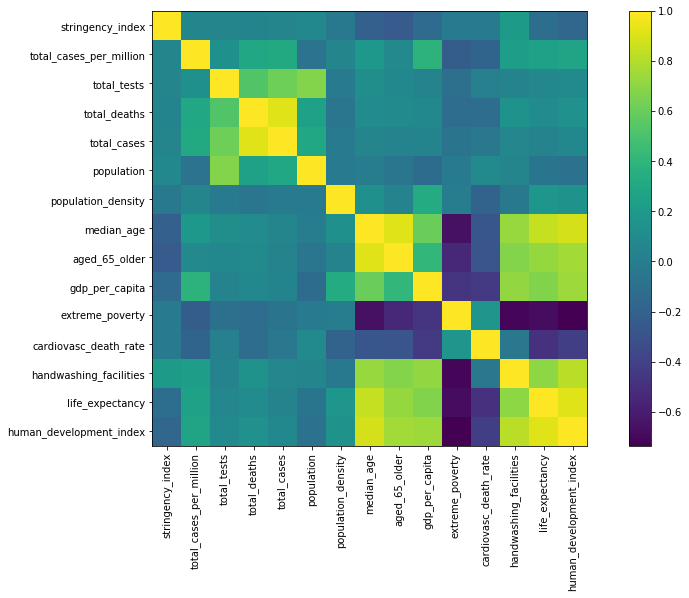

In [93]:
relevant_features_list = ["stringency_index", "total_cases_per_million", "total_tests", "total_deaths", "total_cases",
                             "population", "population_density", "median_age", "aged_65_older", "gdp_per_capita",
                              "extreme_poverty", "cardiovasc_death_rate", "handwashing_facilities", "life_expectancy", 
                              "human_development_index"
                         ]
fig = plt.figure(figsize=(15,8))
plt.imshow(locations_w_test_data_imp_df[relevant_features_list].corr())
cb = plt.colorbar()
ticks = np.arange(0,15,1)
ax = fig.add_subplot(111)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(relevant_features_list, rotation=90)
ax.set_yticklabels(relevant_features_list)
plt.show()

In [102]:
world_covid_df[world_covid_df["date"]=="2020-12-01"].sort_values(by=['stringency_index'], ascending=False)[0:10][['location', 'total_deaths', 'total_cases', 'positive_rate', 'stringency_index', 'population_density', 'gdp_per_capita', 'cardiovasc_death_rate']]


,location,total_deaths,total_cases,positive_rate,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate
29439,Lebanon,1033.0,129455.0,NaN,87.04,594.561,13367.565,266.591
22744,Honduras,2918.0,108253.0,NaN,87.04,82.805,4541.795,240.208
35000,Mongolia,NaN,812.0,NaN,85.19,1.980,11840.846,460.043
56583,Venezuela,901.0,102621.0,NaN,84.26,36.253,16745.022,204.850
19699,Georgia,1303.0,139343.0,NaN,84.26,65.032,9745.079,496.218
3104,Austria,3325.0,285489.0,0.161,82.41,106.749,45436.686,145.183
11089,China,4743.0,92993.0,NaN,81.94,147.674,15308.712,261.899
25367,Ireland,2069.0,72798.0,0.025,81.48,69.874,67335.293,126.459
20658,Greece,2517.0,107470.0,0.101,80.56,83.479,24574.382,175.695
32133,Malaysia,363.0,67169.0,0.066,80.09,96.254,26808.164,260.942


In [103]:
world_covid_df[world_covid_df["date"]=="2020-12-01"].sort_values(by=['stringency_index'], ascending=True)[0:10][['location', 'total_deaths', 'total_cases', 'positive_rate', 'stringency_index', 'population_density', 'gdp_per_capita', 'cardiovasc_death_rate']]

,location,total_deaths,total_cases,positive_rate,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate
281,Afghanistan,1822.0,46516.0,NaN,8.33,54.422,1803.987,597.029
37762,Nicaragua,161.0,5838.0,NaN,8.33,51.667,5321.444,137.016
8270,Burkina Faso,68.0,2931.0,NaN,13.89,70.151,1703.102,269.048
8550,Burundi,1.0,689.0,NaN,14.81,423.062,702.225,293.068
57550,Yemen,619.0,2197.0,NaN,16.67,53.508,1479.147,495.003
33715,Mauritius,10.0,505.0,NaN,16.67,622.962,20292.745,224.644
51835,Tanzania,21.0,509.0,NaN,17.59,64.699,2683.304,217.288
33422,Mauritania,177.0,8710.0,0.107,17.59,4.289,3597.633,232.347
51290,Taiwan,7.0,679.0,0.022,19.44,NaN,NaN,103.957
10131,Central African Republic,63.0,4918.0,NaN,20.37,7.479,661.240,435.727


In [106]:
world_covid_df = world_covid_df[~world_covid_df["stringency_index"].isnull()] # drop ~7000 rows w/o stringency index
world_covid_df = world_covid_df[~world_covid_df["total_cases_per_million"].isnull()] # drop 543 rows w null total cases

# Remove rows with no test data
all_locations = world_covid_df["location"].unique() # this is a numpy array
locations_w_no_test_data = []
for loc in all_locations:
    loc_df = world_covid_df[world_covid_df["location"]==loc]
    if len(loc_df[~loc_df["total_tests"].isnull()]) == 0:
        locations_w_no_test_data.append(loc)
#     else:
#         print(len(loc_df[~loc_df["total_tests"].isnull()]), len(loc_df))
#         loc_df.hist(column="stringency_index", bins='auto')
#         break
print(f"{len(locations_w_no_test_data)} countries have no test data at all. \
If we exclude these we have {171 - len(locations_w_no_test_data)} countries to work with.")

# Create DF with only locations with some test data
locations_w_test_data = [i for i in all_locations if i not in locations_w_no_test_data]
locations_w_test_data_df = world_covid_df[world_covid_df["location"].isin(locations_w_test_data)]
# locations_w_test_data[locations_w_test_data["total_tests"].isnull()] 

#Split into time frames
early_df = locations_w_test_data_df[(locations_w_test_data_df["date"] >= "2020-03-01")
                                  & (locations_w_test_data_df["date"] <= "2020-03-31")] 
late_df = locations_w_test_data_df[(locations_w_test_data_df["date"] >= "2020-12-01")
                                  & (locations_w_test_data_df["date"] <= "2020-12-31")]
print(len(early_df), len(late_df)) #March 2020 and December 2020 - comparable data sizes

# Impute missing test data
early_df = early_df[early_df["location"]]

68 countries have no test data at all. If we exclude these we have 103 countries to work with.
2693 2467


KeyError: "None of [Index(['Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina',\n       'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina',\n       ...\n       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe',\n       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe'],\n      dtype='object', length=2693)] are in the [columns]"

Locations with partial missing test data
Australia


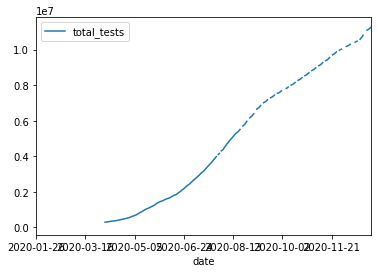

Austria


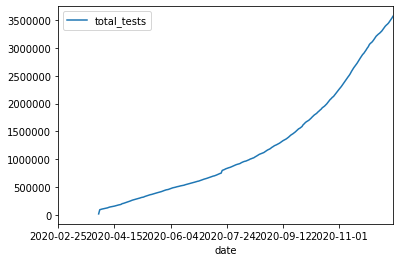

Bahrain


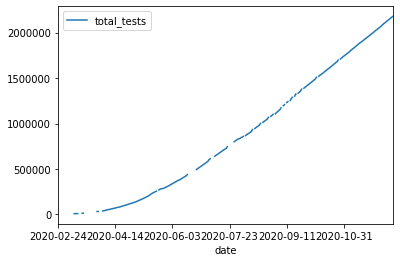

Bangladesh


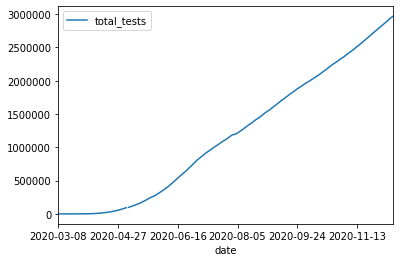

Belarus


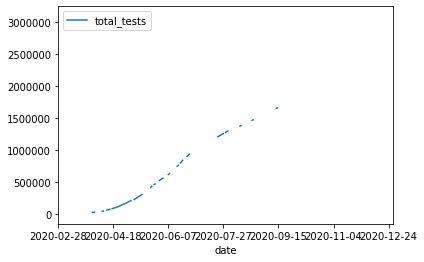

Belgium


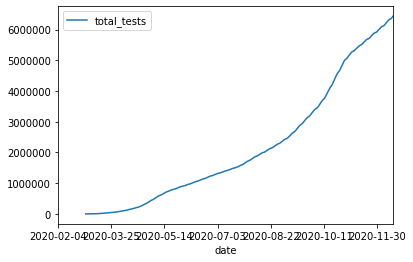

Bolivia


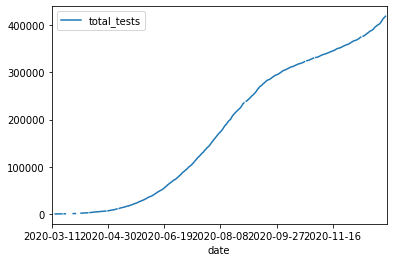

Brazil


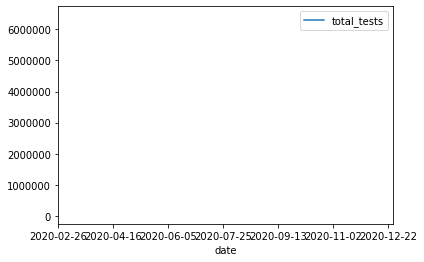

Bulgaria


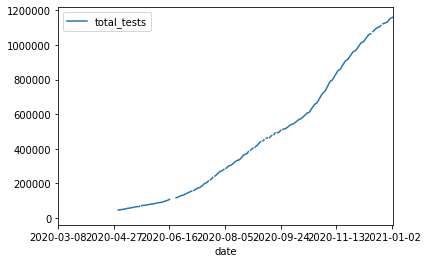

Canada


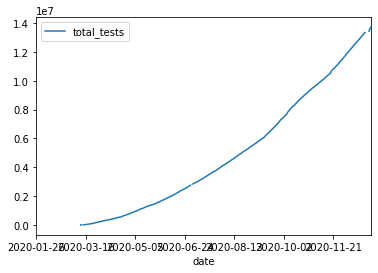

Chile


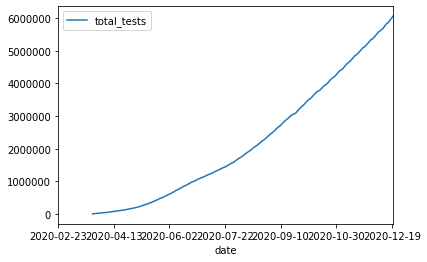

China


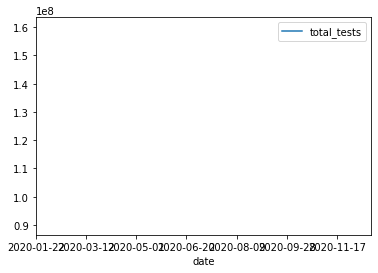

Colombia


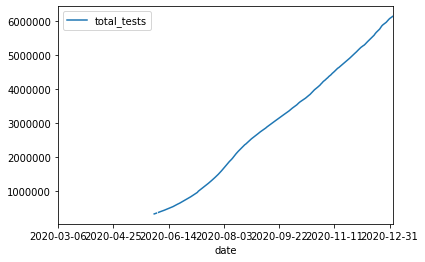

Costa Rica


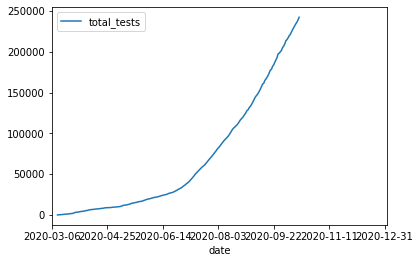

Cote d'Ivoire


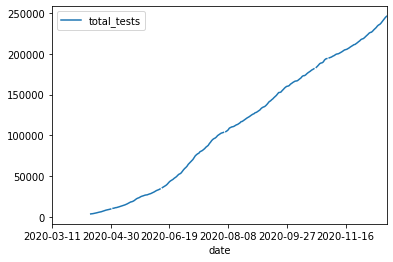

Croatia


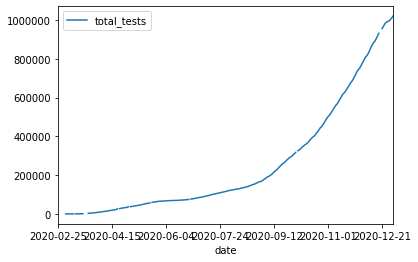

Cuba


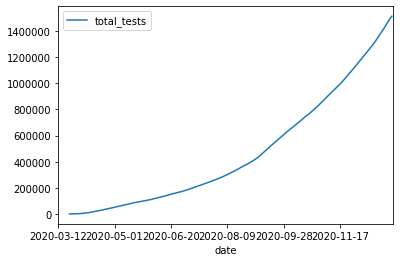

Cyprus


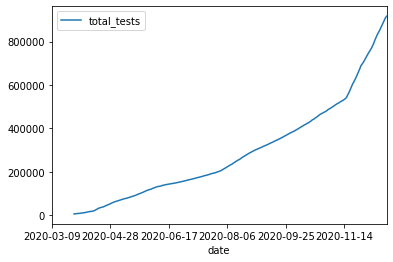

Dominican Republic


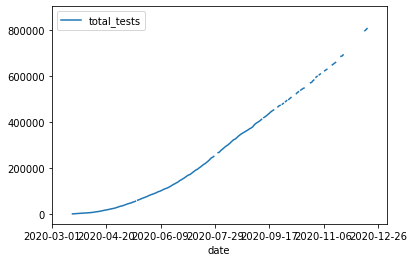

Ecuador


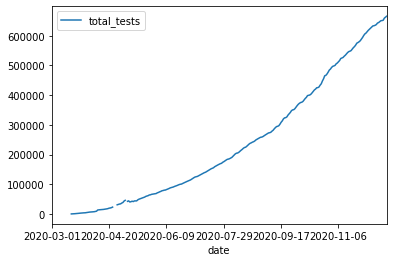

El Salvador


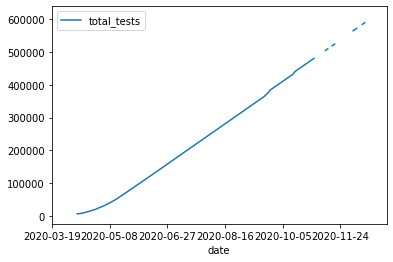

Ethiopia


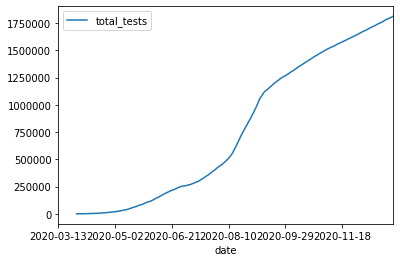

Fiji


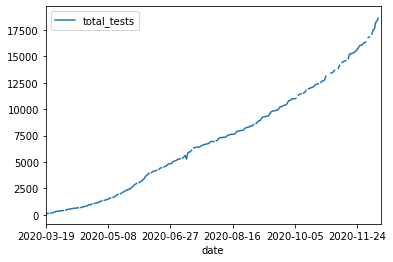

Finland


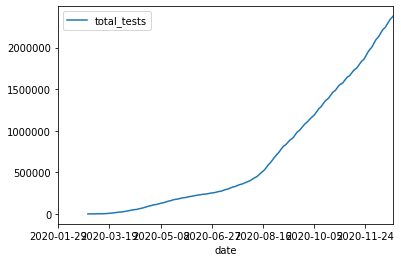

Germany


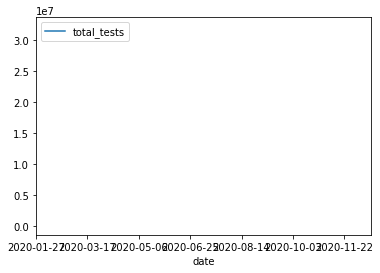

Ghana


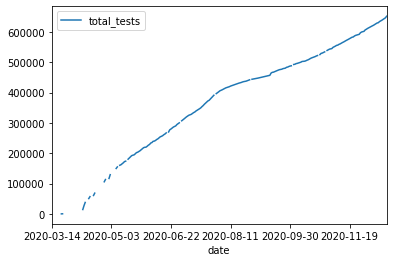

Greece


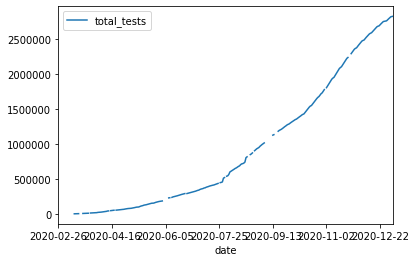

Guatemala


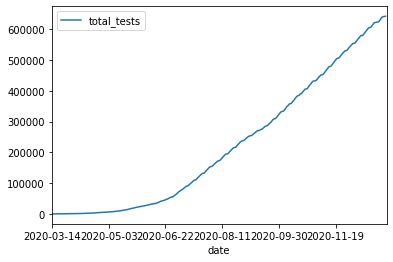

Hungary


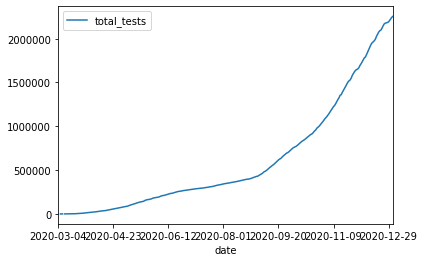

India


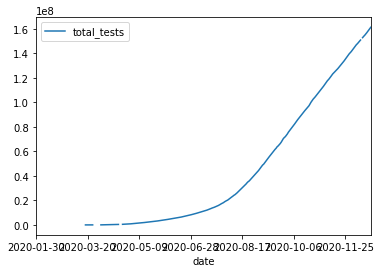

Indonesia


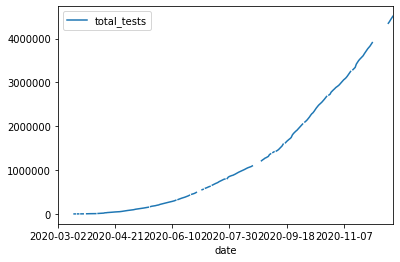

Iran


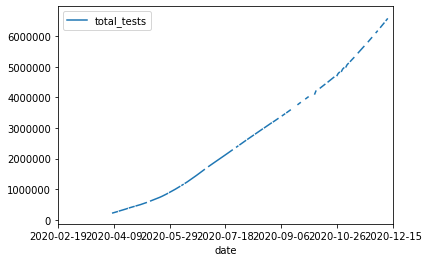

Iraq


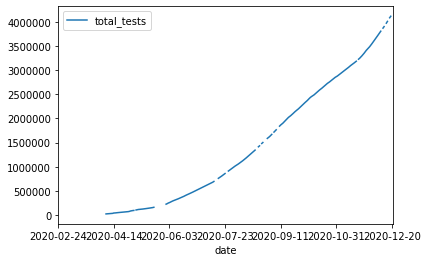

Ireland


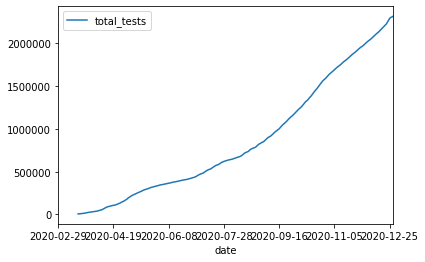

Italy


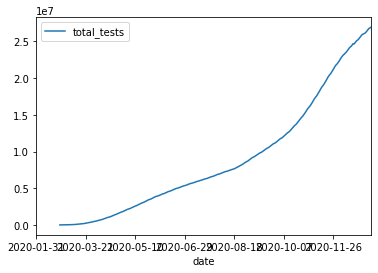

Jamaica


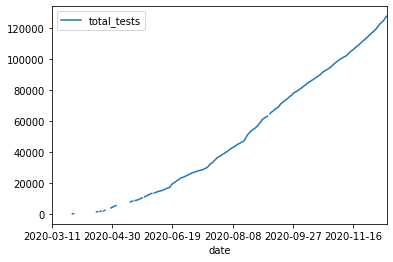

Japan


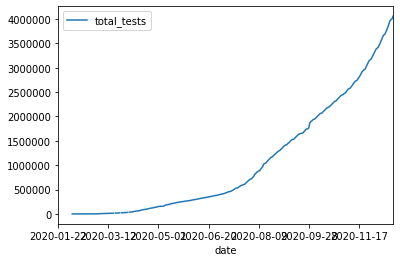

Jordan


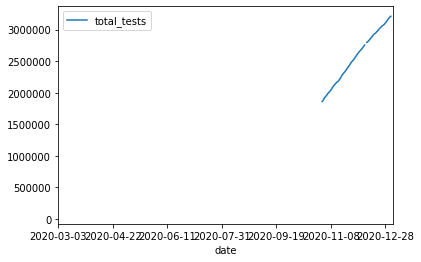

Kazakhstan


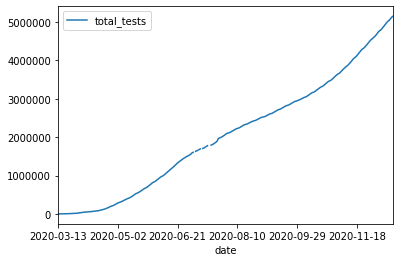

Kenya


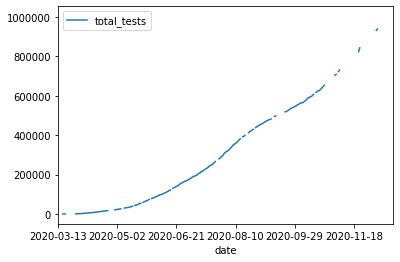

Kuwait


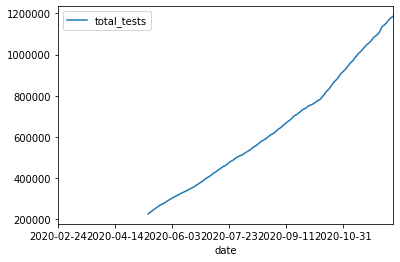

Lithuania


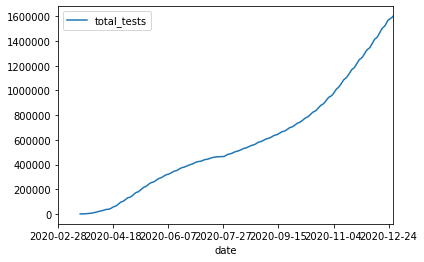

Luxembourg


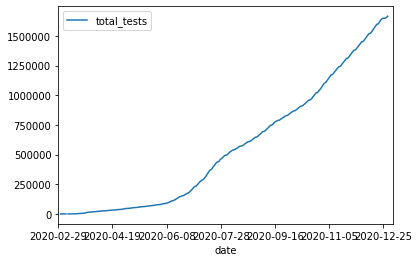

Madagascar


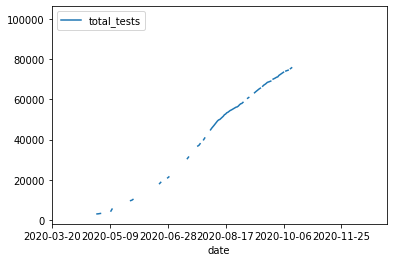

Malawi


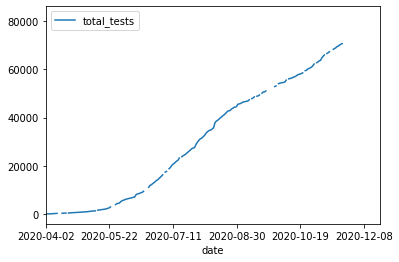

Malaysia


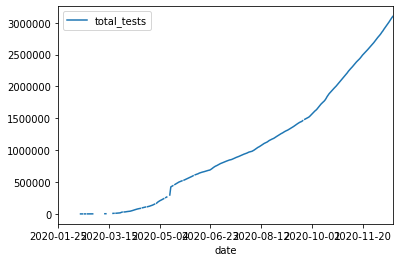

Malta


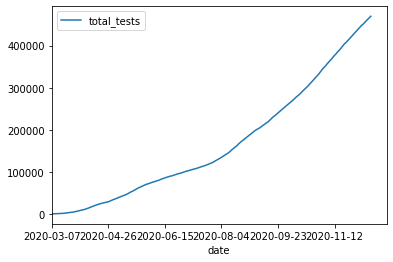

Mauritania


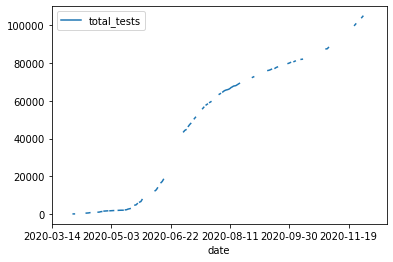

Mexico


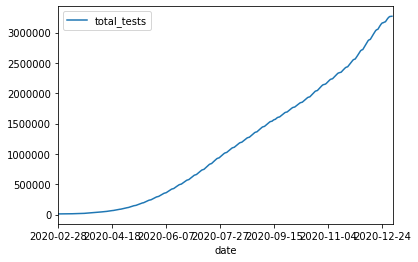

Morocco


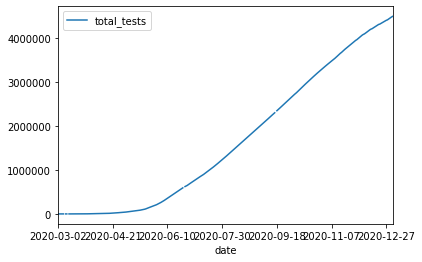

Mozambique


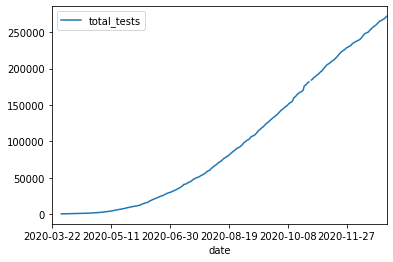

Myanmar


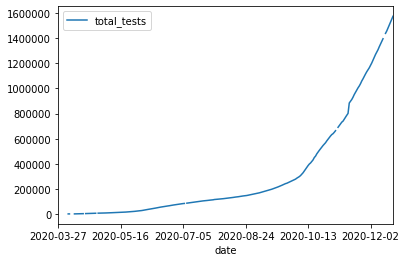

Namibia


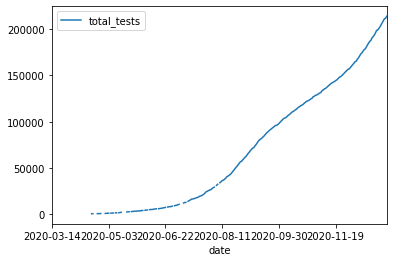

Nepal


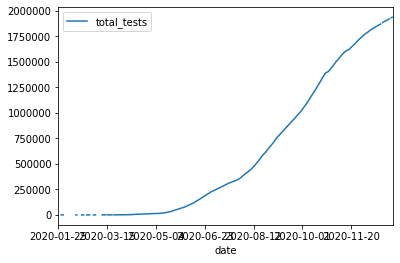

Netherlands


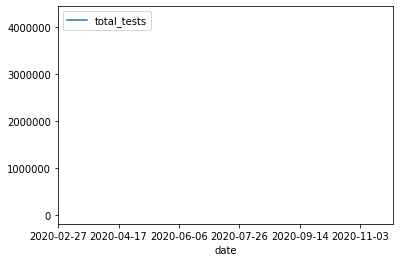

New Zealand


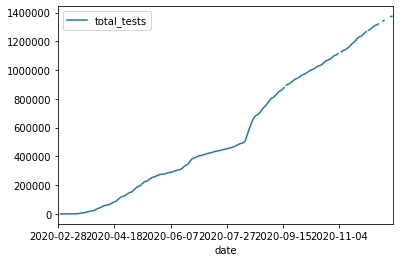

Nigeria


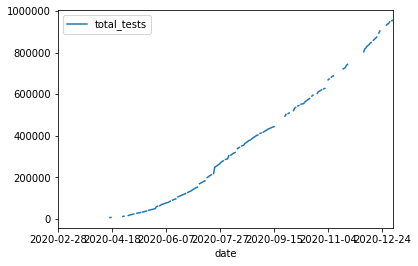

Pakistan


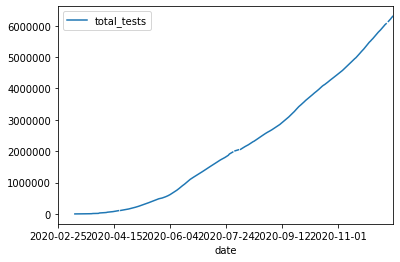

Panama


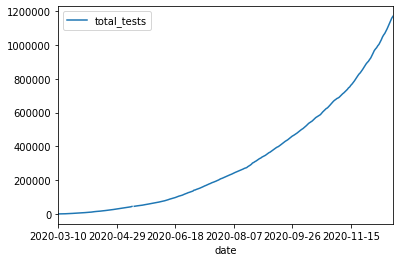

Paraguay


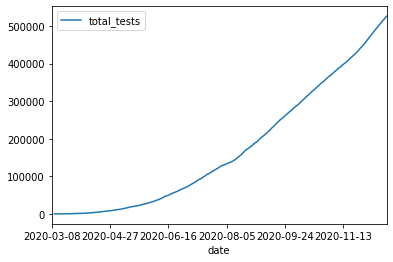

Philippines


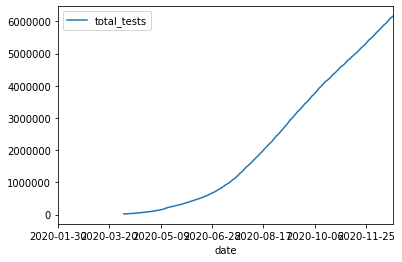

Poland


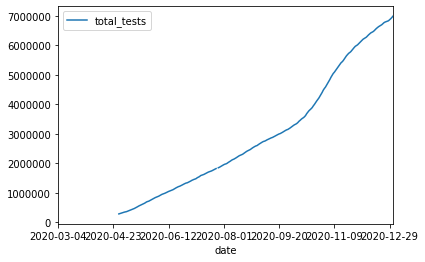

Qatar


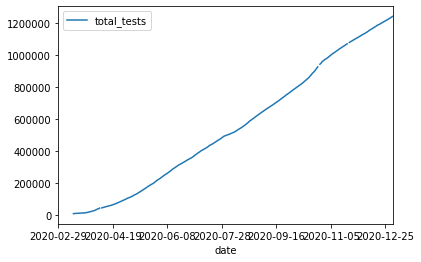

Romania


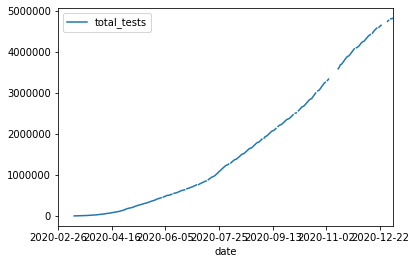

Russia


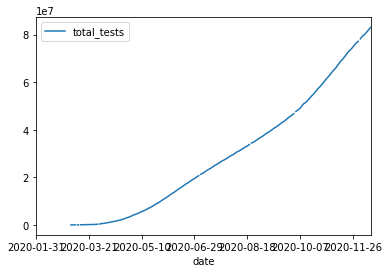

Rwanda


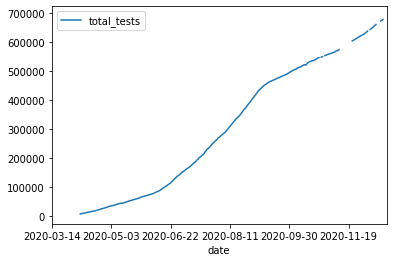

Senegal


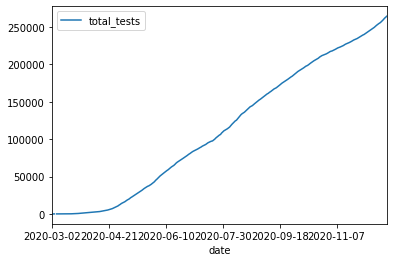

Singapore


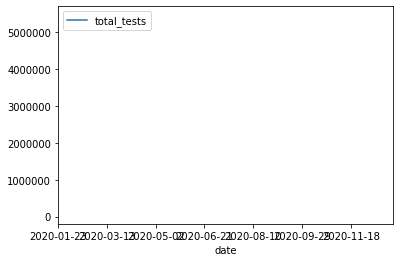

Slovenia


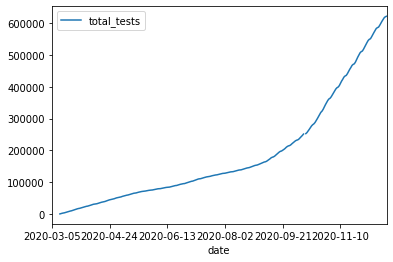

South Africa


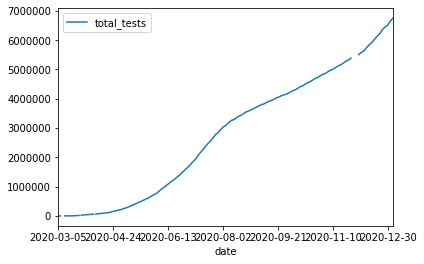

South Korea


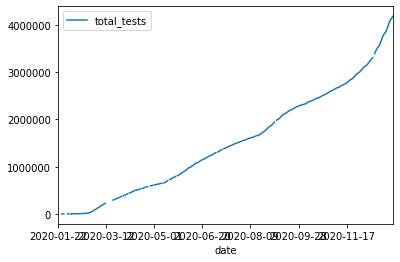

South Sudan


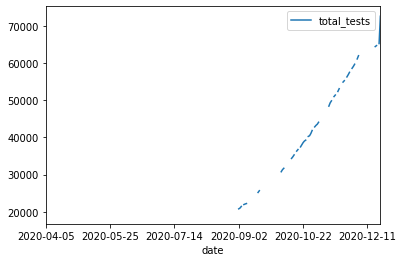

Spain


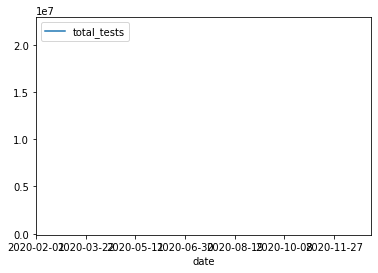

Sri Lanka


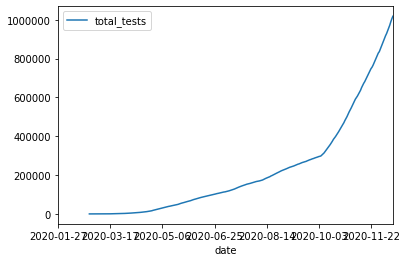

Switzerland


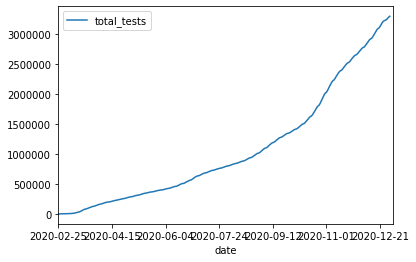

Togo


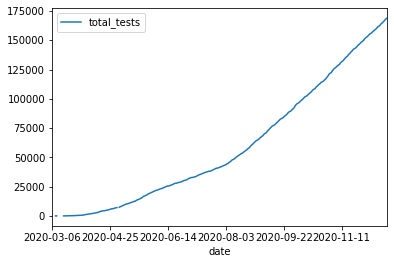

Trinidad and Tobago


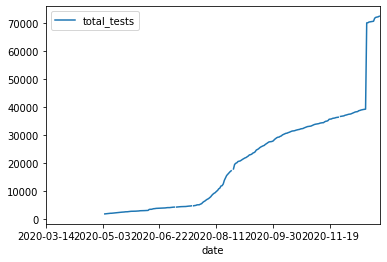

Tunisia


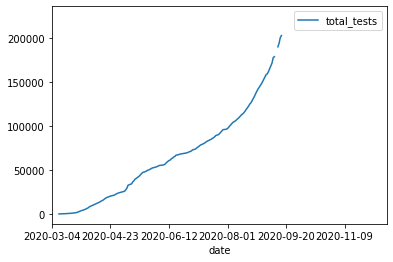

Turkey


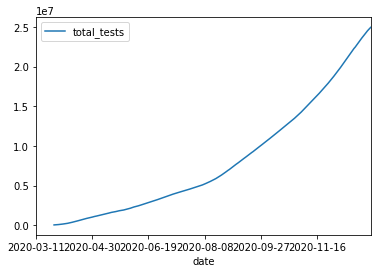

Uganda


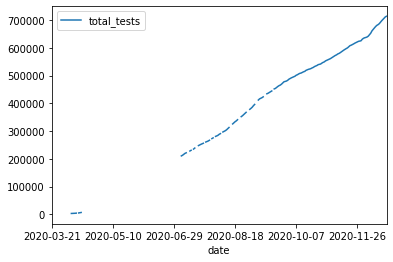

Ukraine


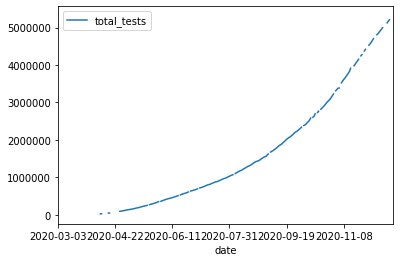

United Arab Emirates


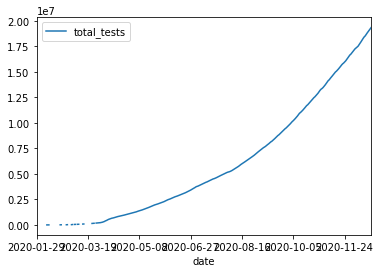

United Kingdom


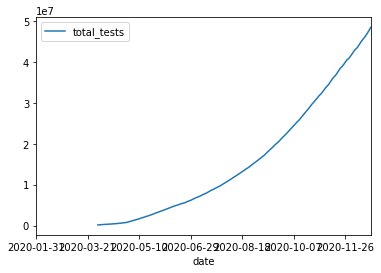

United States


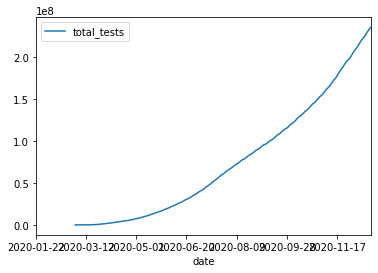

Uruguay


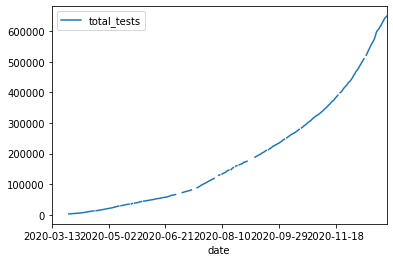

Vietnam


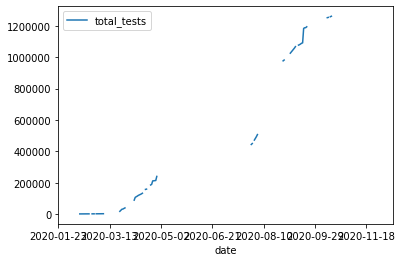

Zambia


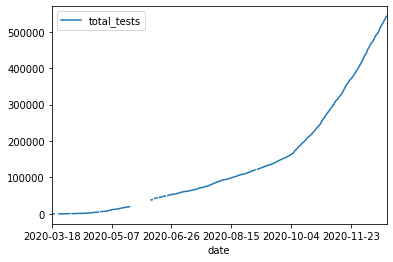

Zimbabwe


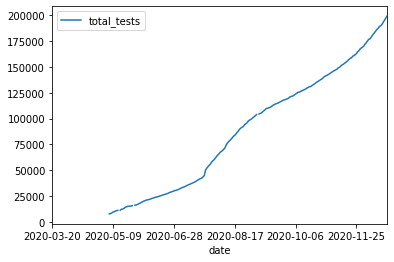

In [67]:
# what does the missing test data look like
print("Locations with partial missing test data")
for loc in locations_w_test_data:
    loc_df = locations_w_test_data_df[locations_w_test_data_df["location"]==loc]
    num_missing = loc_df["total_tests"].isna().sum()
    if num_missing>0:
        # print and show missing test data -> mostly monotonically increasing
        print(loc)
        loc_df.plot(x='date', y='total_tests', kind='line') 
        plt.show()

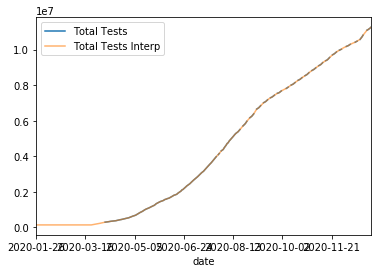

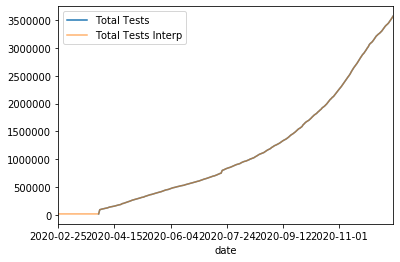

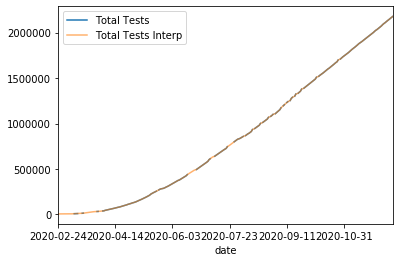

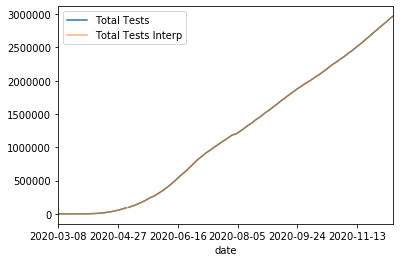

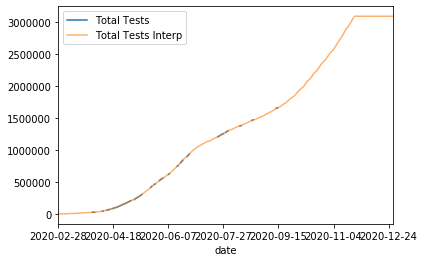

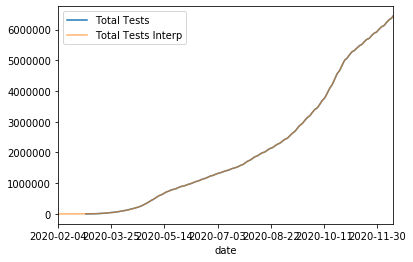

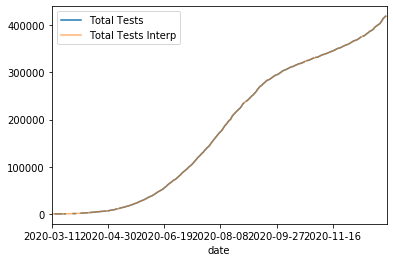

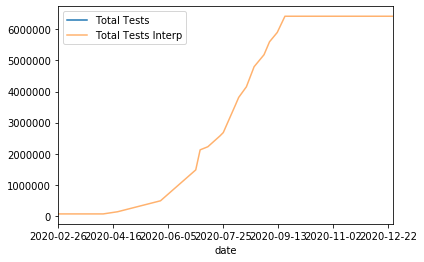

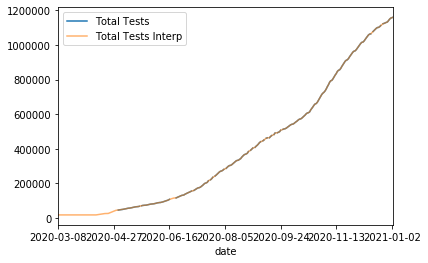

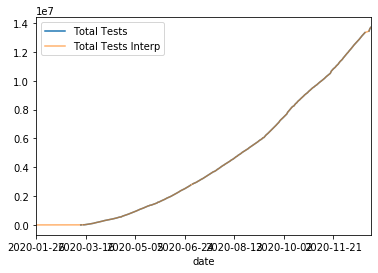

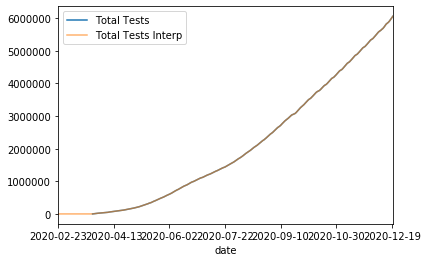

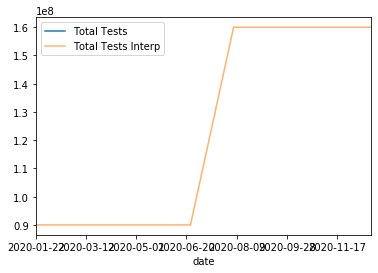

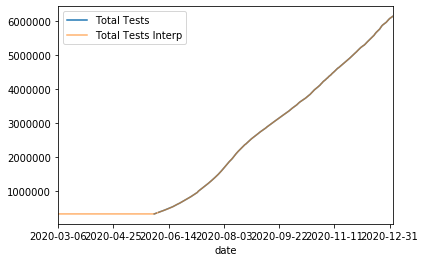

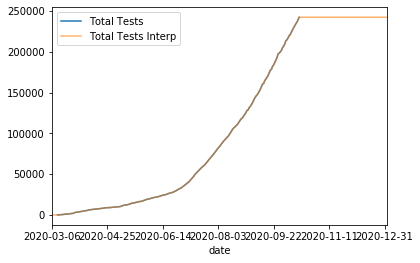

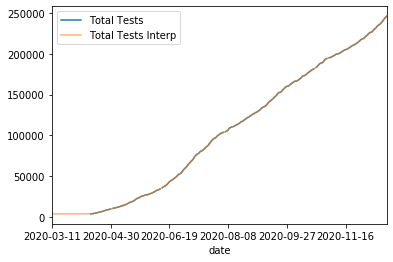

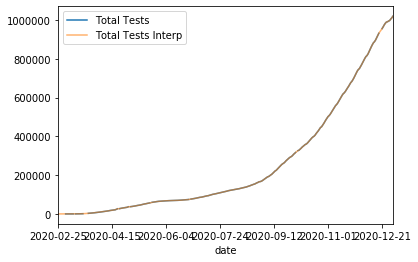

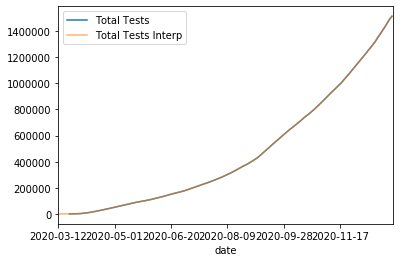

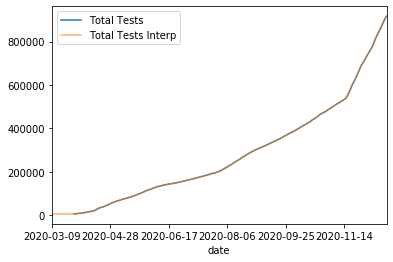

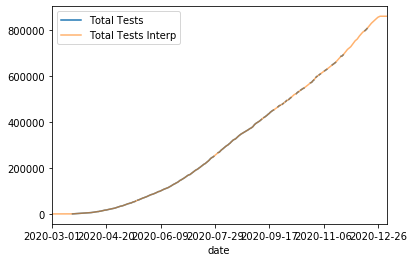

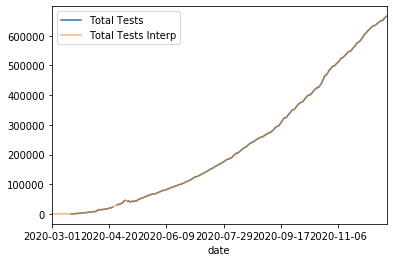

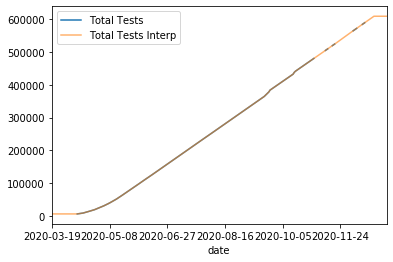

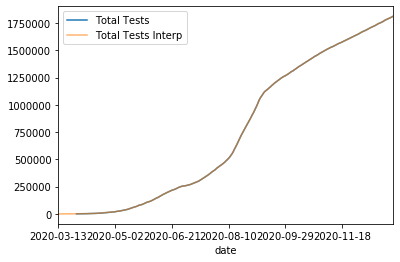

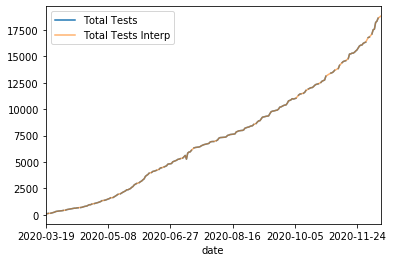

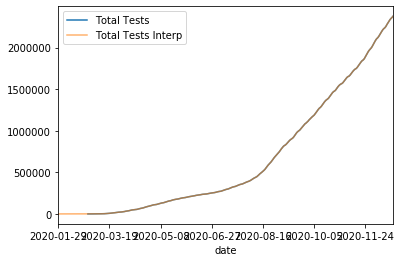

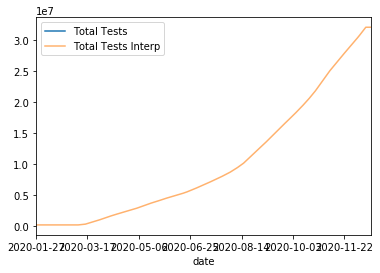

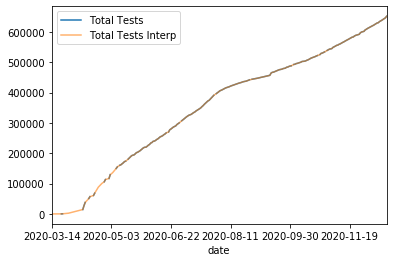

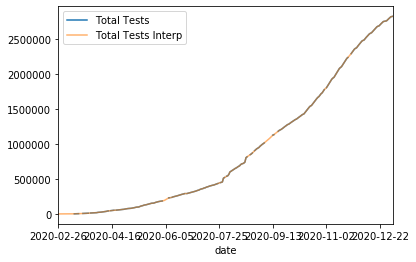

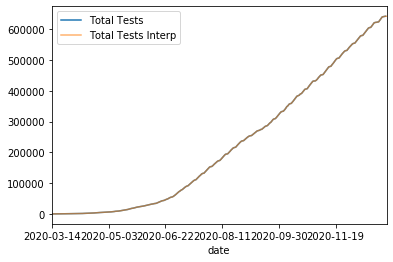

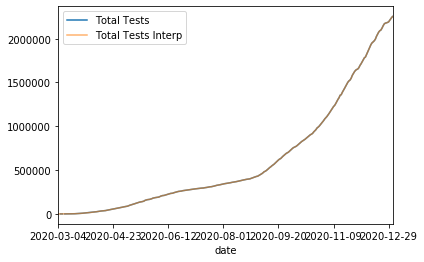

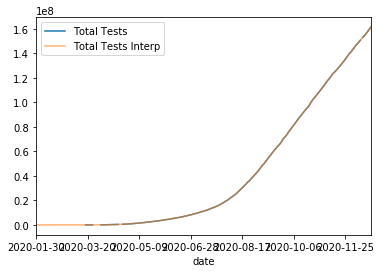

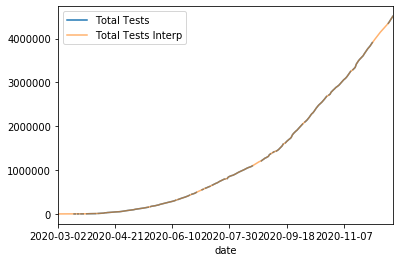

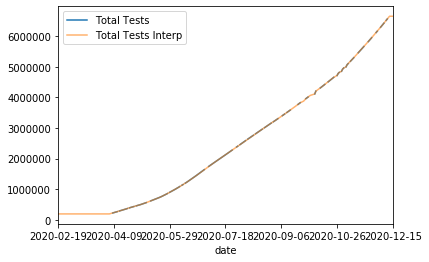

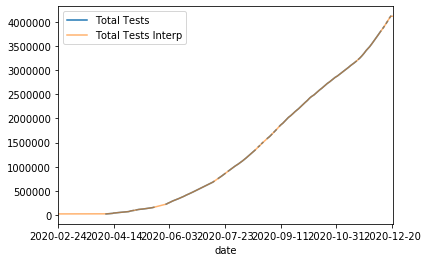

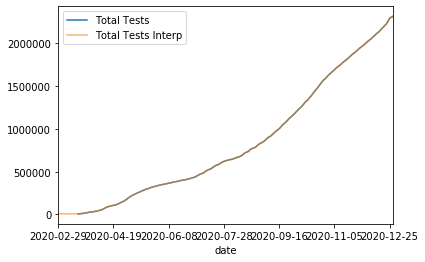

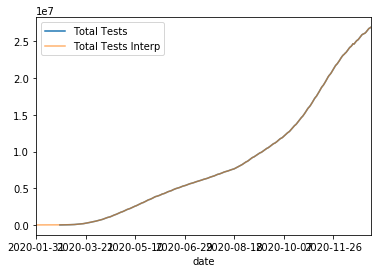

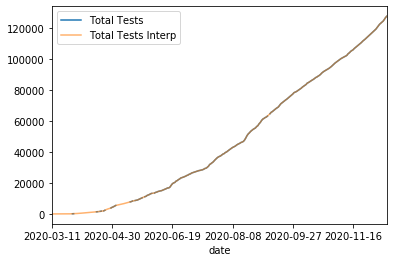

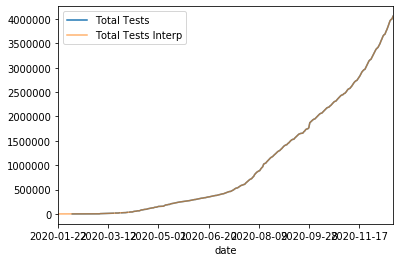

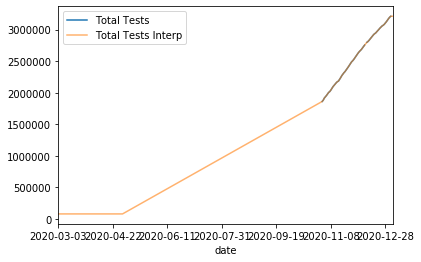

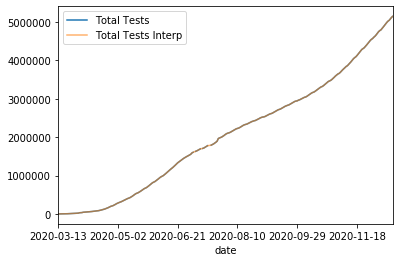

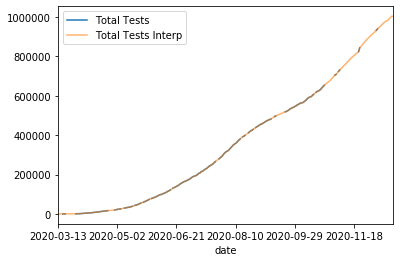

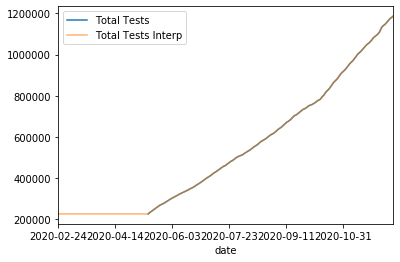

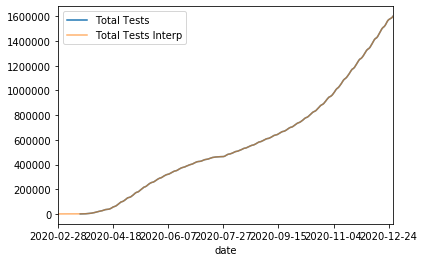

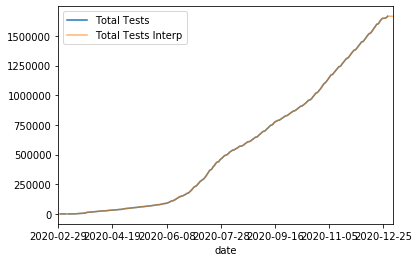

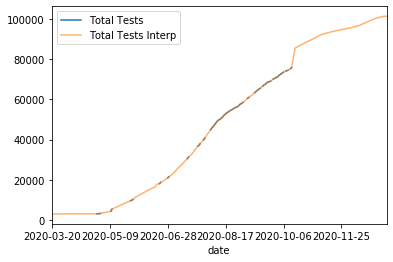

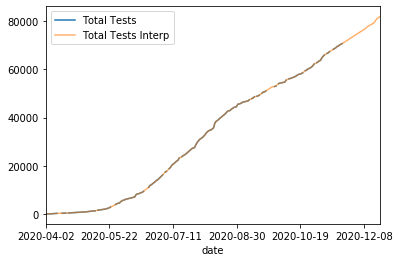

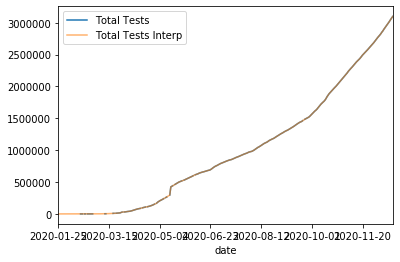

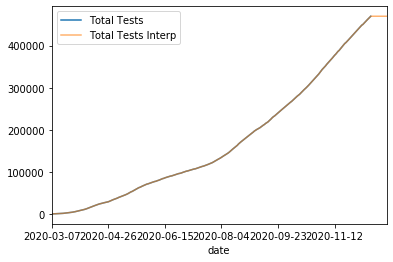

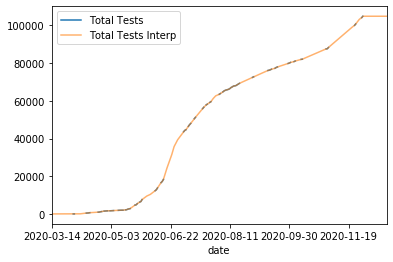

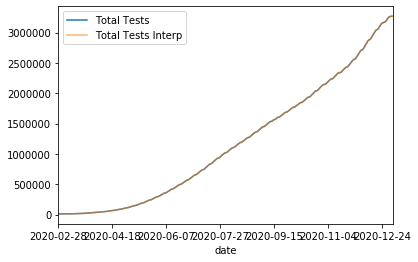

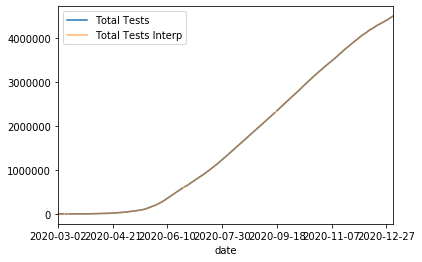

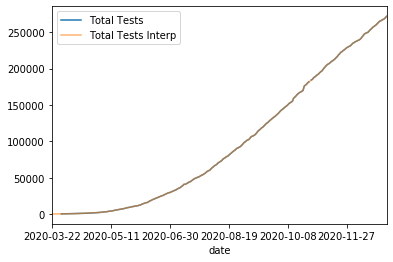

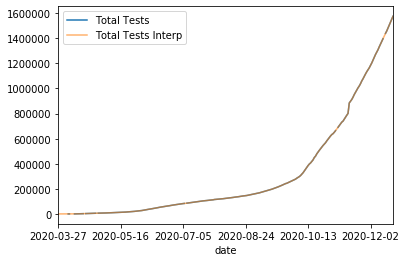

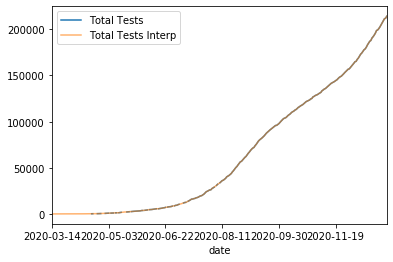

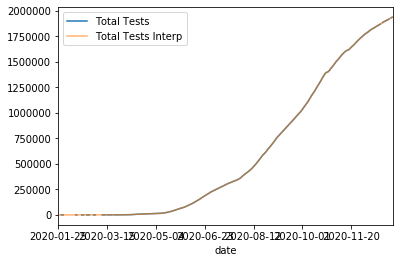

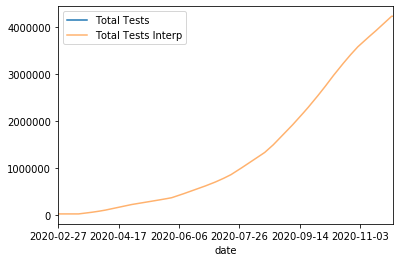

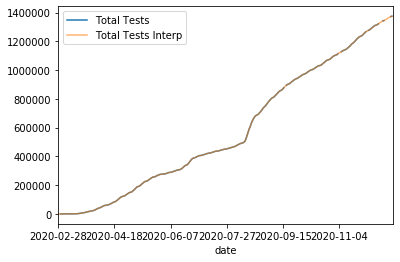

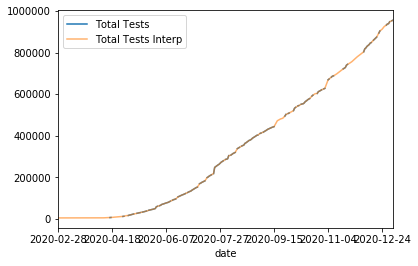

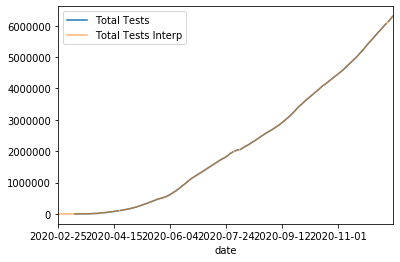

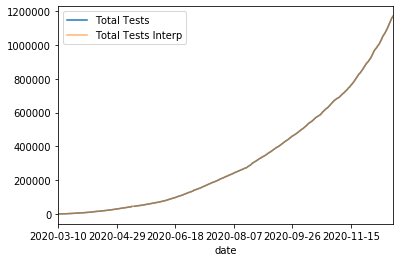

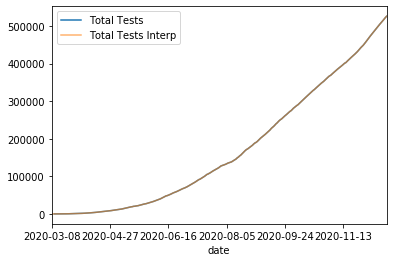

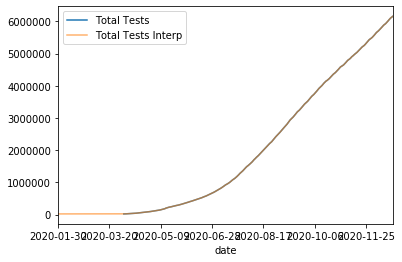

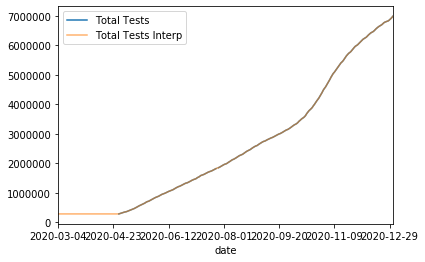

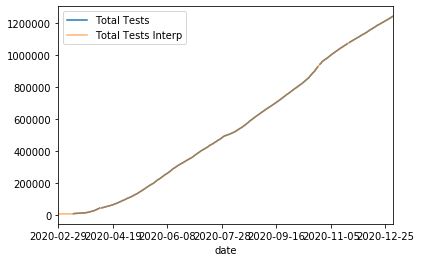

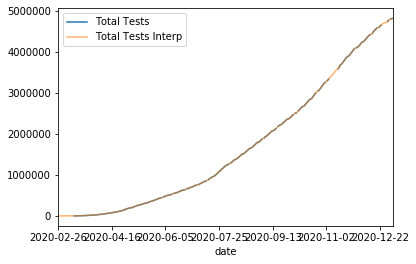

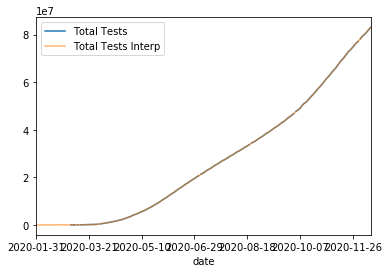

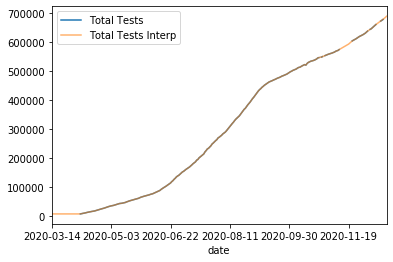

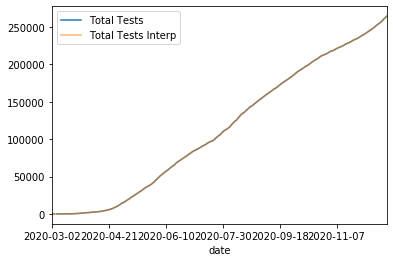

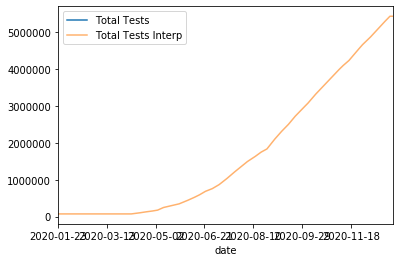

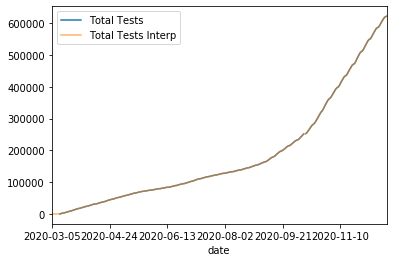

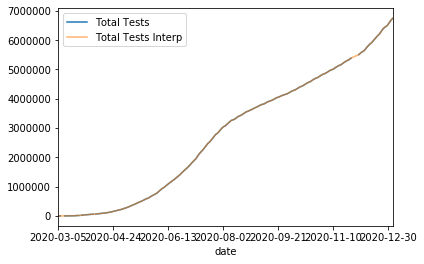

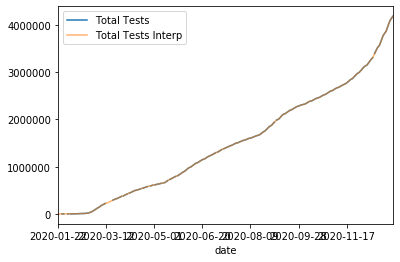

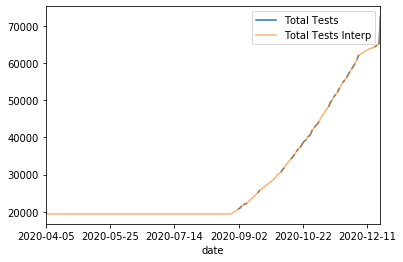

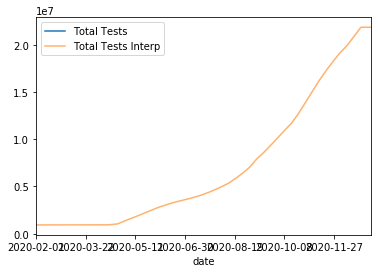

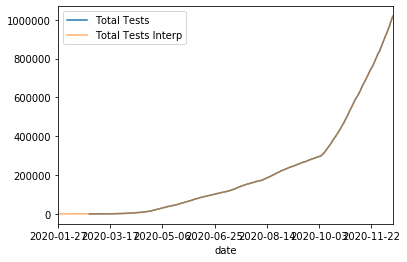

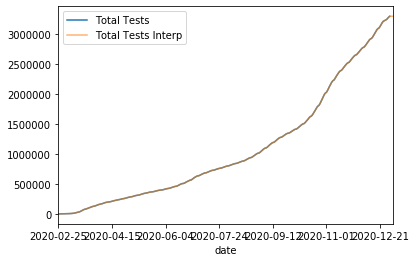

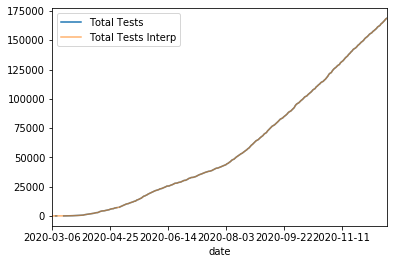

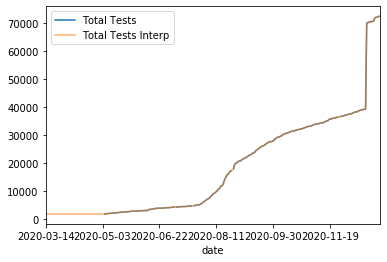

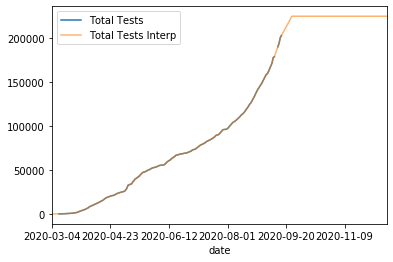

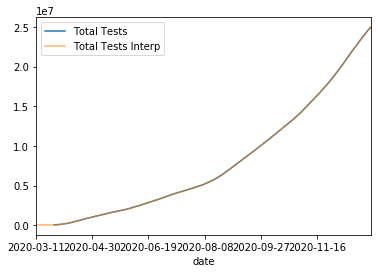

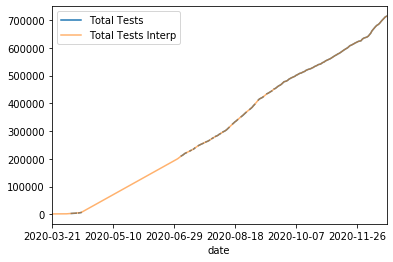

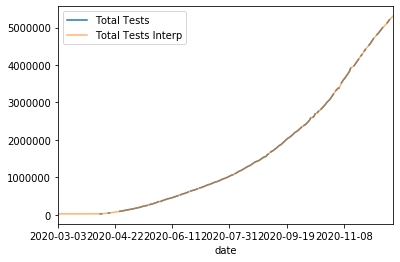

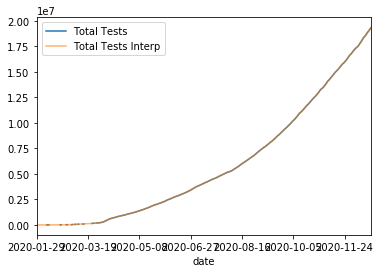

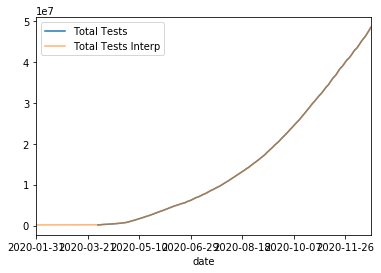

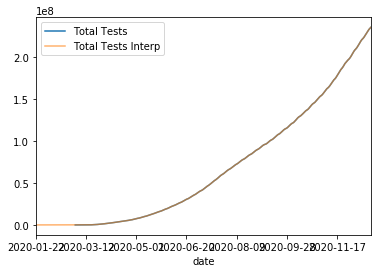

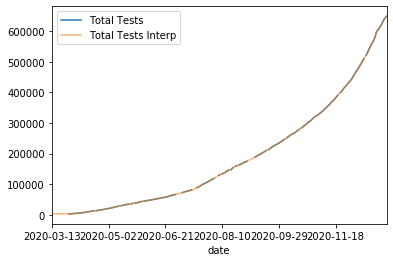

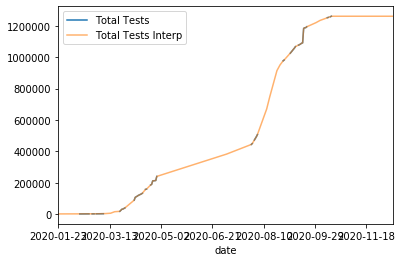

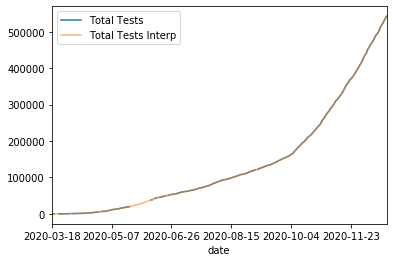

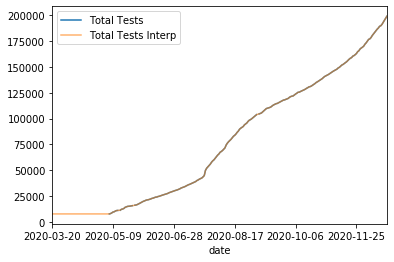

In [68]:
# Interpolate missing total_tests

locations_w_test_data_imp_df = pd.DataFrame(columns=locations_w_test_data_df.columns)

for loc in locations_w_test_data:
    loc_df = locations_w_test_data_df[locations_w_test_data_df["location"]==loc]
    loc_df_imp = loc_df.copy();
    num_missing = loc_df["total_tests"].isna().sum()
    if num_missing>0:
        total_tests_interp = loc_df["total_tests"].interpolate(method ='linear', limit_direction ='both')
        loc_df_imp["total_tests"] = total_tests_interp;
        # assemble df
        locations_w_test_data_imp_df = locations_w_test_data_imp_df.append(loc_df_imp);
        # plot result
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        loc_df.plot(x='date', y='total_tests', kind='line',  ax=ax1)
        loc_df_imp.plot(x='date', y='total_tests', kind='line',  ax=ax1,alpha=0.6)
        ax1.legend(["Total Tests", "Total Tests Interp"])
        plt.show()